# <p style="background-color:#fce303; font-family:Arial;color:Black; font-size:150%; text-align:center; border-radius: 10px 40px;"> ⚛ Dataset Explanation ⚛</p>
<div style="border-radius:10px;
            border : black solid;
            background-color: #1a2636;
            font-size:100%;
            text-align: left">
<h2 style=' border:0; border-radius: 15px; font-weight: bold; font-size:220%; color:white'><center> Explanation of the Variables </center></h2> 
    
* ****Symbol:**** The stock symbol or ticker symbol of the company.
* ****Name:**** The name of the company or security.
* ****Price (Intraday):**** The current price of the security at the time of the last trade.
* ****Change:**** The change in the price of the security from the previous day's closing price.
* ****% Change:**** The percentage change in the price of the security from the previous day's closing price.
* ****Market Cap:**** The total value of all outstanding shares of the company's stock.
* ****Volume in Currency (Since 0:00 UTC):**** The total value of shares traded since midnight UTC.
* ****Volume in Currency (24Hr):**** The total value of shares traded in the last 24 hours.
* ****Circulating Supply:**** The number of shares of the company's stock currently in circulation.

<a id = "1"></a>
# <p style="background-color:#032928; font-family:newtimeroman;color:white; font-size:150%; text-align:center; border-radius: 15px 30px;"> ☀ Import Libraries ☀</p>

In [156]:
# Classic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Advanced Visualization Libraries
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True) #enables plotly plots to be displayed in notebook
cmap1 = "gist_gray"
import altair as alt
import country_converter as coco
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Models
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

#Metrics, Preprocessing and Tuning Tools
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import missingno as msno
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#Customization
import warnings
warnings.filterwarnings("ignore")

<a id = "2"></a>
# <p style="background-color:#6b5b95; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 30px;"> ⇣ Load and Check Data ⇣</p>

In [169]:
#load data set
crypto = pd.read_csv(r"C:\Users\mdala\Downloads\Yahoo_Finance.csv")
#copy this data set
df =crypto.copy()

In [183]:
def check_data(df):
    #showing how many col and row exist in this dataset
    print(f"Shape : {df.shape}")
    print(60*"⬜")
    #showing col name
    print(f"Column Name:\n{df.columns.values}")
    print(60*"⬜")
    #type of this data set
    print(f"Types of Data:\n{df.dtypes}")  
check_data(df)

Shape : (9619, 10)
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
Column Name:
['Symbol' 'Name' 'price' 'Change' 'percent_change' 'market_cap'
 'vol_cur_utc' 'vol_cur_hour' 'total_vol_hour' 'circulating_sup']
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
Types of Data:
Symbol              object
Name                object
price              float64
Change             float64
percent_change     float64
market_cap         float64
vol_cur_utc        float64
vol_cur_hour       float64
total_vol_hour     float64
circulating_sup    float64
dtype: object


In [171]:
#showing us how many not nan or nan values exist in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9619 entries, 0 to 9618
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Symbol                               9619 non-null   object
 1   Name                                 9619 non-null   object
 2   Price (Intraday)                     9619 non-null   object
 3   Change                               9619 non-null   object
 4   % Change                             9619 non-null   object
 5   Market Cap                           9619 non-null   object
 6   Volume in Currency (Since 0:00 UTC)  9470 non-null   object
 7   Volume in Currency (24Hr)            9470 non-null   object
 8   Total Volume All Currencies (24Hr)   9470 non-null   object
 9   Circulating Supply                   9619 non-null   object
dtypes: object(10)
memory usage: 751.6+ KB


In [172]:
df.head()

,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply
0,BTC-USD,Bitcoin USD,"27,425.81","-1,519.70",-5.25%,531.172B,18.642B,18.642B,18.642B,19.368M
1,ETH-USD,Ethereum USD,"1,836.74",-79.01,-4.12%,221.024B,10.1B,10.1B,10.1B,120.335M
2,USDT-USD,Tether USD,1.0007,-0.0004,-0.04%,82.148B,32.218B,32.218B,32.218B,82.088B
3,BNB-USD,BNB USD,312.82,-11.05,-3.41%,48.756B,633.938M,633.938M,633.938M,155.861M
4,USDC-USD,USD Coin USD,1.0001,0.0003,0.03%,30.151B,4.478B,4.478B,4.478B,30.147B


<a id = "2"></a>
# <p style="background-color:#81FA51; font-family:newtimeroman;color:Black; font-size:150%; text-align:center; border-radius: 15px 30px;"> ⇣ Data Clean ⇣</p>

In [173]:
#changing col name and type to int
df =df.rename(columns={"Price (Intraday)" :"price",
                  "% Change":"percent_change",
                  "Market Cap":"market_cap",
                  "Volume in Currency (Since 0:00 UTC)": "vol_cur_utc" ,
                  "Volume in Currency (24Hr)": "vol_cur_hour",
                  "Total Volume All Currencies (24Hr)": "total_vol_hour",
                  "Circulating Supply": "circulating_sup"
                     })
df = df.copy()
df.head(1)

,Symbol,Name,price,Change,percent_change,market_cap,vol_cur_utc,vol_cur_hour,total_vol_hour,circulating_sup
0,BTC-USD,Bitcoin USD,"27,425.81","-1,519.70",-5.25%,531.172B,18.642B,18.642B,18.642B,19.368M


In [174]:
#replacing comma,%,-USD unnecessary things, which show data as object 
#then convert into float and take two decimal point
def normal_change(df):
    df["Symbol"] = df["Symbol"].str.replace("-USD","")
    df["Name"] = df["Name"].str.replace(" USD","")
    df["price"]  = df["price"].str.replace(",","").astype("float")
    df["Change"] = df["Change"].str.replace(",","").astype("float")
    df["percent_change"] = df["percent_change"].str.replace("%","").astype("float")
normal_change(df)

In [176]:
#for multiple replace and calculation create a function 
#Replacing B,M,K and B(10**9) ,M(10**6),K(10**3)
def convert_market_cap(value):
    if value.endswith("T"):
        value = value.replace("T", "").replace(",", "")
        return float(value) * 10**12
    elif value.endswith("B"):
        value = value.replace("B", "").replace(",", "")
        return float(value) * 10**9
    elif value.endswith("M"):
        value = value.replace("M", "").replace(",", "")
        return float(value) * 10**6
    elif value.endswith("k"):
        value = value.replace("k", "").replace(",", "")
        return float(value) * 10**3
    else:
        value = value.replace(",", "").replace(",", "")
        return float(value)
#this two are diffent from other
df["market_cap"]  = df["market_cap"].apply(convert_market_cap)
df["circulating_sup"] = df["circulating_sup"].apply(convert_market_cap)

In [177]:
#this section was complicated 
#not all value are str so run cell by cell so that you can findout 
def custom_multiplier(value):
    value = str(value)
    if value.endswith("T"):
        return (value[:-1]) * 10**12
    elif value.endswith("M"):
        return float(value[:-1]) * 10**9
    elif value.endswith("B"):
        return float(value[:-1]) * 10**6
    elif value.endswith("k"):
        return (value[:-1]) * 10**3
    else:
        value = value.replace(",", "").replace(",", "")
        return float(value)
df["vol_cur_utc"] = df["vol_cur_utc"].apply(custom_multiplier).astype(float)
df["total_vol_hour"] = df["total_vol_hour"].apply(custom_multiplier)
df["vol_cur_hour"] = df["vol_cur_hour"].apply(custom_multiplier)

In [188]:
def info_about_nan(df):
    print(f"Sum of Nan values:\n{df.isnull().sum()}")
    print(60*"⬜")
    print(f"Number Of UNIQUE VALUES:\n{df.nunique()}")
    print(60*"⬜")
    print(f"MISSING VALUES:\n{df.isnull().sum()}")
    print()
info_about_nan(df)

Sum of Nan values:
Symbol               0
Name                 0
price                0
Change               0
percent_change       0
market_cap           0
vol_cur_utc        149
vol_cur_hour       149
total_vol_hour     149
circulating_sup      0
dtype: int64
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
Number Of UNIQUE VALUES:
Symbol             7333
Name               7254
price              5776
Change             3571
percent_change     2781
market_cap         2598
vol_cur_utc        5341
vol_cur_hour       5341
total_vol_hour     5341
circulating_sup    2532
dtype: int64
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
MISSING VALUES:
Symbol               0
Name                 0
price                0
Change               0
percent_change       0
market_cap           0
vol_cur_utc        149
vol_cur_hour       149
total_vol_hour     149
circulating_sup      0
dtype: int64



<Axes: >

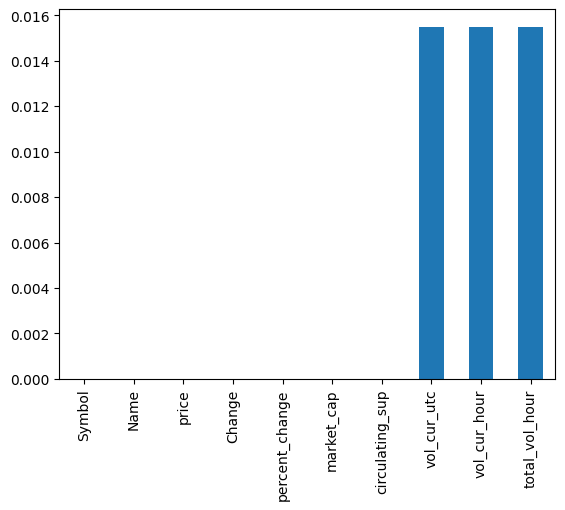

In [189]:
(df.isna().sum()/df.shape[0]).sort_values().plot(kind="bar")

In [190]:
#filling missing data with '0' cause when i scrap this data i don't get any kind of real data 
def filling_nan(df):
    df["vol_cur_utc"].fillna(0,inplace=True)
    df["vol_cur_hour"].fillna(0,inplace=True)
    df["total_vol_hour"].fillna(0,inplace=True)
filling_nan(df)

In [195]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    #cat_cols           #cat_but_car
    # categorical_cols, categorical_but_character
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(" RESULT ".center(50,"⬜"))
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    print(" RESULT ".center(50,"⬜"))
    
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜ RESULT ⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
Observations: 9619
Variables: 10
cat_cols: 0
num_cols: 8
cat_but_car: 2
num_but_cat: 0
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜ RESULT ⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


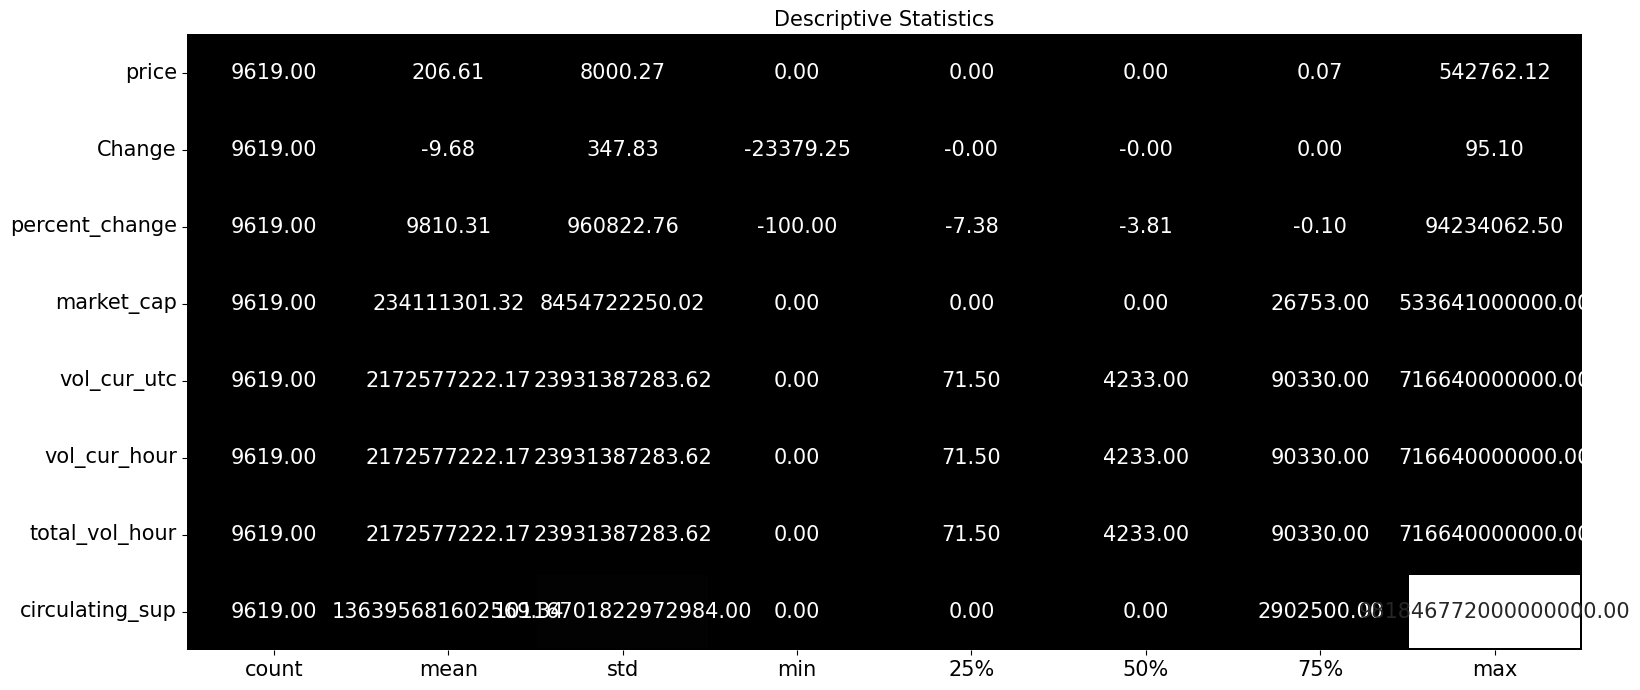

In [199]:
def descriptive_stats(df):
    #describing the data set in heat map
    desc = df.describe().T
    desc_df = pd.DataFrame(index = df. columns,
                          columns = desc.columns,
                          data = desc)
    f, ax = plt.subplots(figsize = (18, 8))
    sns.heatmap(desc,
               annot = True,
               cmap = cmap1,
               fmt = ".2f",
               ax = ax,
               linecolor = "Black",
               linewidths = 1.5,
               cbar = False,
               annot_kws = {"size" : 15})
    plt.xticks(size = 15)
    plt.yticks(size = 15, rotation = 0)
    plt.title("Descriptive Statistics", size = 15)
    plt.show()   
descriptive_stats(df[num_cols])

<div style="border-radius:10px;
            border : black solid;
            background-color: #5b9aa0;
            font-size:100%;
            text-align: left">
    
<h2 style='; border:1; border-radius: 20px; font-weight: bold; font-size:220%; color:white'><center> Summary of the Dataset </center></h2> 
    
 * <b> The dataset consists of 9619 rows and 10 columns </b>
 * <b> The target variable is price & Change of currency </b>
 * <b> We have 2 categorical and 8 numerical variables </b>
 * <b> There was exist some missing values,which is filled by '0',cause those wasn't exist when we collect data </b>
 * <b> Descriptive statistics show that some features have outliers </b>

<a id = "3"></a>
# <p style="background-color:#6b5b95; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ⚡ Exploratory Data Analysis (EDA) ⚡</p>

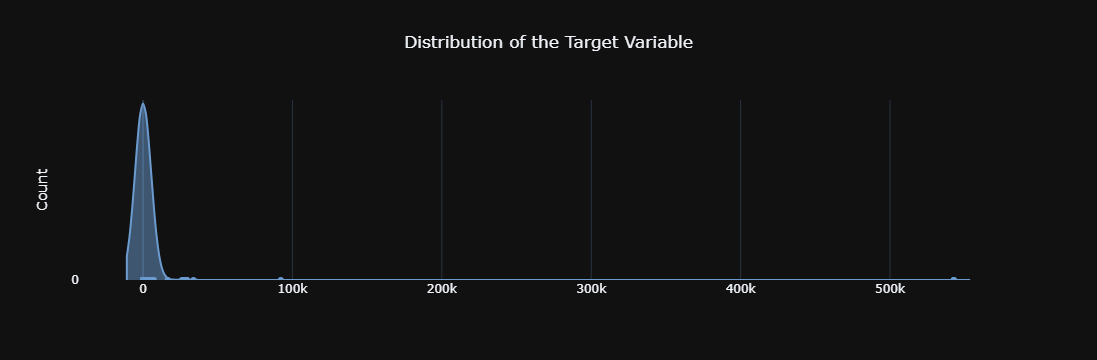

In [202]:
def tar_var_summary(df, target):
    fig = go.Figure()
    fig.add_trace(go.Violin(x=df[target], line_color='#6C9BCF', name='Happy', y0=0))
    fig.update_traces(orientation='h', side='positive', meanline_visible=False)
    fig.update_layout(title={'text': "Distribution of the Target Variable",
                             'y':0.9,
                             'x':0.5,
                             'xanchor':'center',
                             'yanchor':'top'},
                             barmode='overlay',
                             yaxis=dict(title='Count'),
                             template = 'plotly_dark')
    fig.show()
    
tar_var_summary(df,"price")

In [211]:
df.head()

,Symbol,Name,price,Change,percent_change,market_cap,vol_cur_utc,vol_cur_hour,total_vol_hour,circulating_sup
0,BTC,Bitcoin,27425.8100,-1519.7000,-5.25,5.311720e+11,1.864200e+07,1.864200e+07,1.864200e+07,1.936800e+07
1,ETH,Ethereum,1836.7400,-79.0100,-4.12,2.210240e+11,1.010000e+07,1.010000e+07,1.010000e+07,1.203350e+08
2,USDT,Tether,1.0007,-0.0004,-0.04,8.214800e+10,3.221800e+07,3.221800e+07,3.221800e+07,8.208800e+10
3,BNB,BNB,312.8200,-11.0500,-3.41,4.875600e+10,6.339380e+11,6.339380e+11,6.339380e+11,1.558610e+08
4,USDC,USD Coin,1.0001,0.0003,0.03,3.015100e+10,4.478000e+06,4.478000e+06,4.478000e+06,3.014700e+10


In [206]:
def num_var_summary(df, num_var):
    fig = make_subplots(rows = 1, cols = 2,
                       subplot_titles = ("Quantiles", "Distribution"))
    
    fig.add_trace(go.Box(y = df[num_var],
                         name = str(num_var),
                         showlegend = False,
                         marker_color = "#A6D0DD"), 
                         row = 1, col = 1)
    
    fig.add_trace(go.Histogram(x = df[num_var],
                               xbins = dict(start = df[num_var].min(),
                                            end = df[num_var].max()),
                               showlegend = False,
                               name = str(num_var),
                               marker=dict(color="#0A4D68",
                                           line = dict(color = '#DBE6EC',
                                                       width = 1))
                              ),
                  row = 1, col = 2)
    
    fig.update_layout(title={'text': num_var.capitalize(),
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_dark')
    iplot(fig)

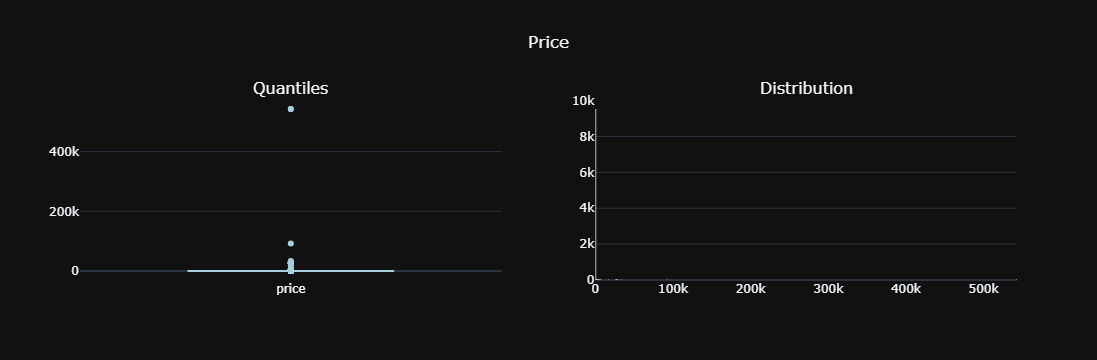

In [213]:
num_var_summary(df, "price")

In [216]:
def detect_outliers(df, num_var):
    
    trace0 = go.Box(
        y = df[num_var],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = '#a2b9bc'),
        line = dict(
            color = '#6b5b95')
    )

    trace1 = go.Box(
        y = df[num_var],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = '#b2ad7f'),
        line = dict(
            color = '#feb236')
    )

    trace2 = go.Box(
        y = df[num_var],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = '#b5e7a0',
            outliercolor = '#878f99',
            line = dict(
                outliercolor = '#d64161',
                outlierwidth = 2)),
        line = dict(
            color = '#86af49')
    )

    trace3 = go.Box(
        y = df[num_var],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = '#6b5b95'),
        line = dict(
            color = '#ff7b25')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(num_var)
    )
    
    layout = go.Layout(title={'text': num_var,
                         'y':0.9,
                         'x':0.5,
                         'xanchor':'center',
                         'yanchor':'top'},
                         barmode='overlay',
                         yaxis=dict(title='Count'),
                         template = 'plotly_dark')

    fig = go.Figure(data=data,layout=layout)
    
    iplot(fig)

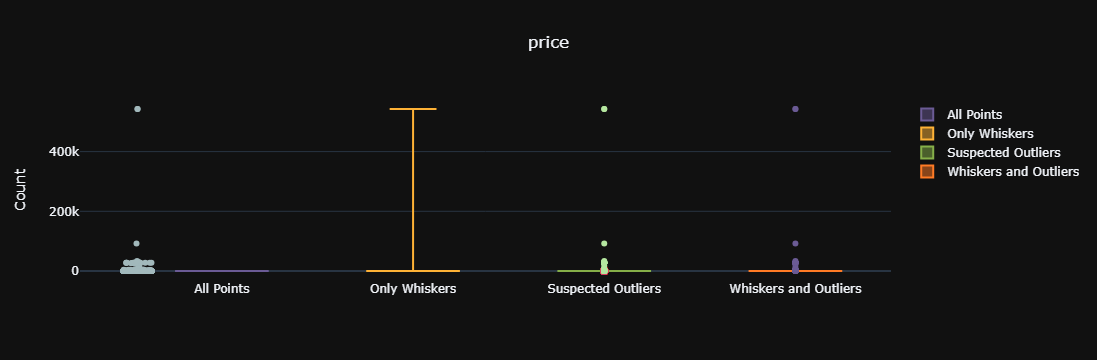

In [217]:
detect_outliers(df, "price")

<function matplotlib.pyplot.show(close=None, block=None)>

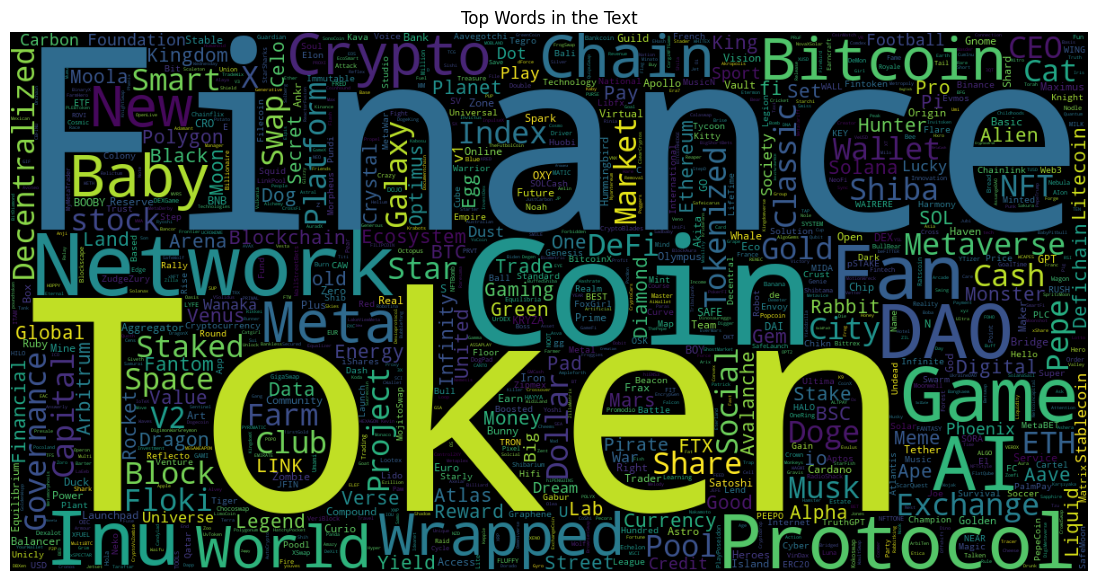

In [226]:
text = df['Name'].values
text = ' '.join(text)

wc = WordCloud(background_color = "black", width = 1200, height = 600,
               contour_width = 0, contour_color = "#410F01", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [15, 7])
plt.title("Top Words in the Text")
plt.imshow(wc)
plt.axis("off")
plt.show